# Final project

**Name:**
Zaynab Alnuwayri

**Date:** 
30/04/2024

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns

In [92]:
df =  pd.read_csv('kc_house_data.csv')
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

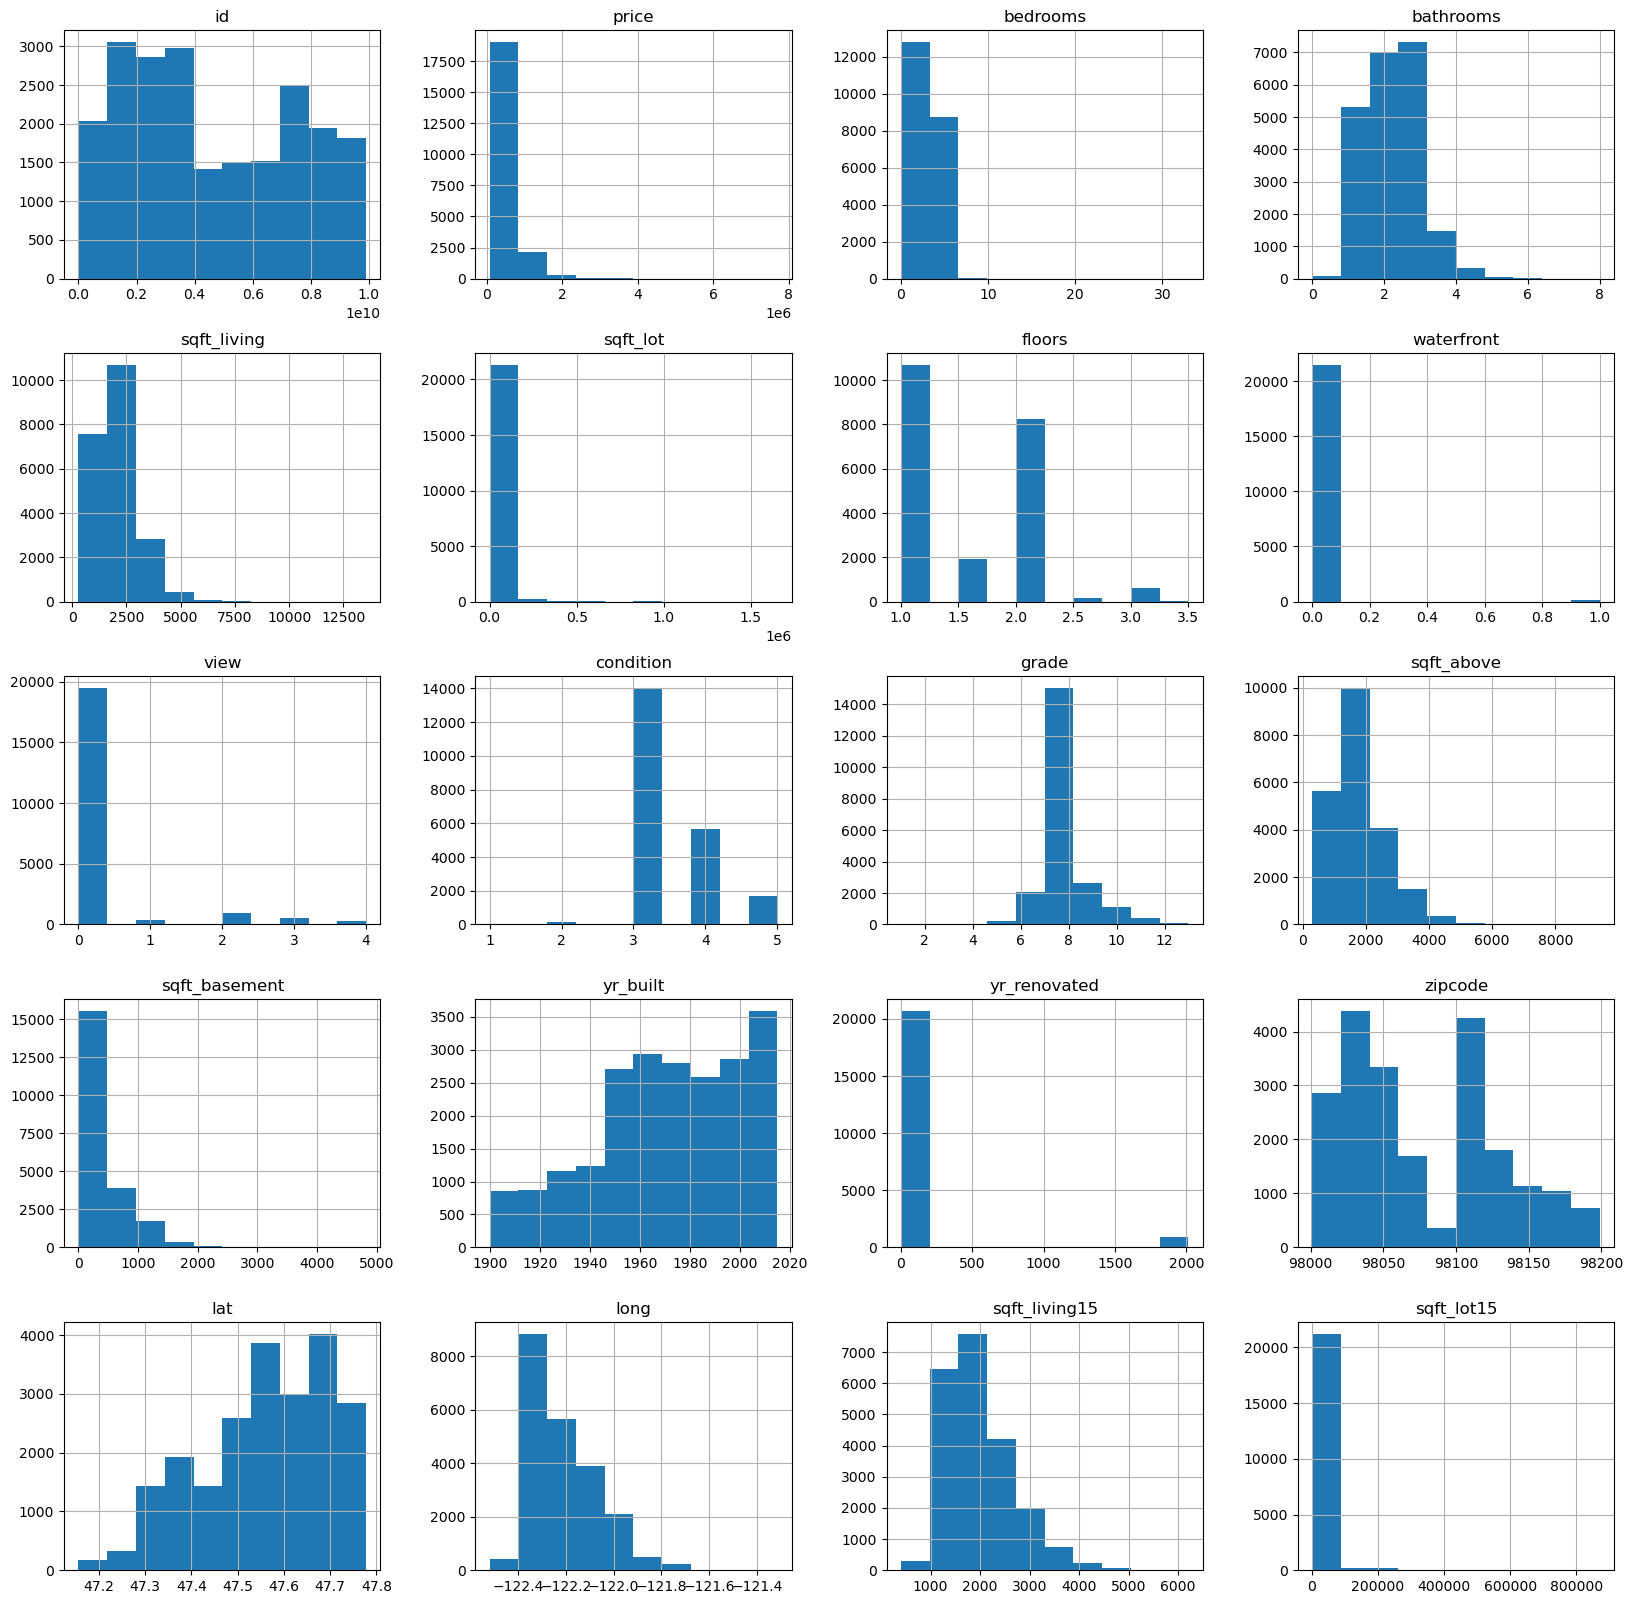

In [4]:
df.hist(figsize=(20,20));

In [93]:
df.drop(columns=["id","date","lat","long","yr_renovated","sqft_lot15"],inplace=True)

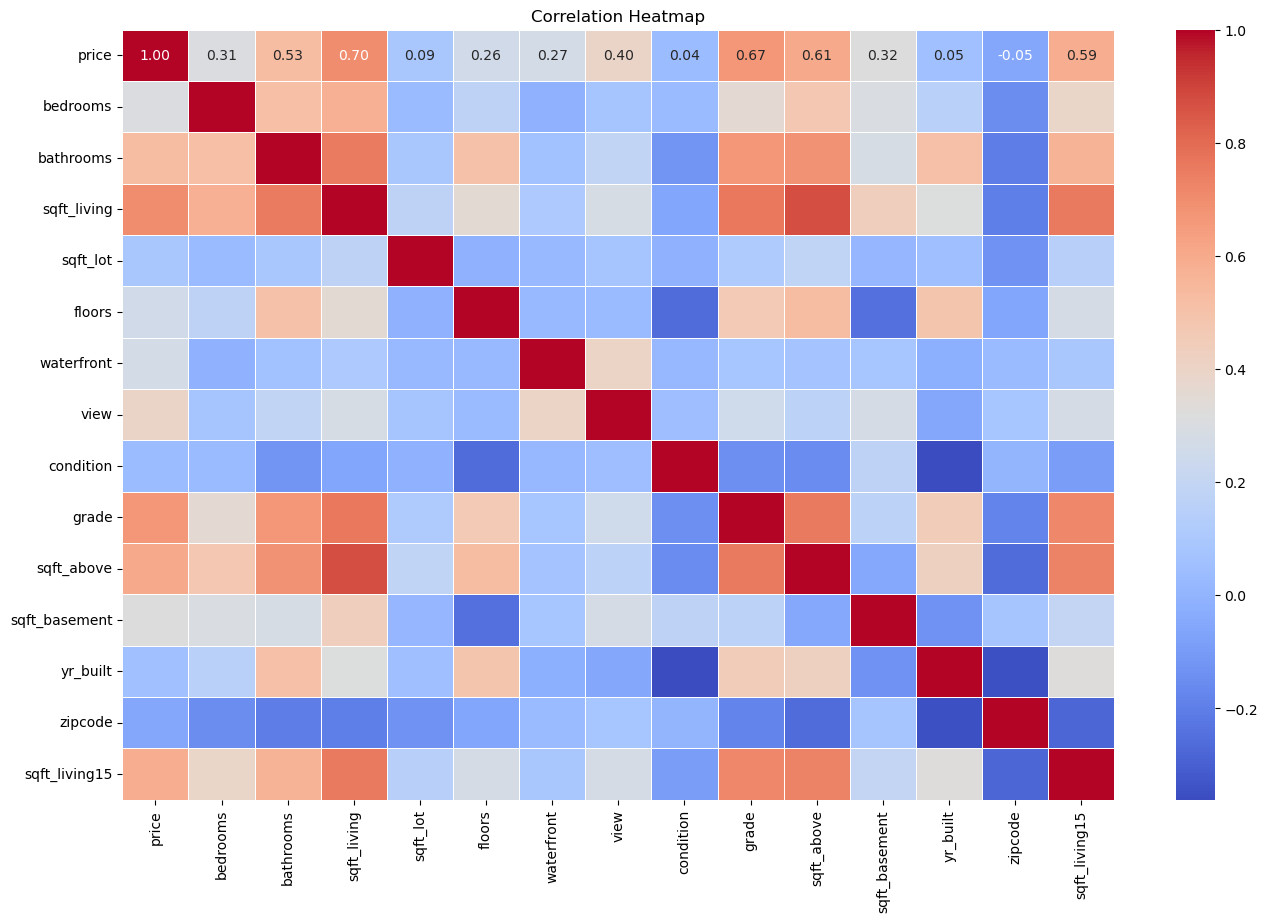

In [6]:
correlation_matrix = df.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',  fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


In [7]:
columns_to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] > abs(0.75):
            # Add one of the two highly correlated features to the set
            # We add the feature that occurs later (has a higher index) in the correlation matrix
            col_name = correlation_matrix.columns[j]
            columns_to_drop.add(col_name)

# Drop the columns from the DataFrame
df_reduced = df.drop(columns=columns_to_drop)

# Display the DataFrame after dropping highly correlated columns
print("Dropped columns:", columns_to_drop)

# Drop highly correlated features from the DataFrame
df_reduced = df.drop(columns=columns_to_drop)

# Print the columns remaining after removing highly correlated features
print("Remaining columns:",df_reduced.columns)

Dropped columns: {'sqft_living15', 'sqft_living', 'grade', 'sqft_above'}
Remaining columns: Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'sqft_basement', 'yr_built', 'zipcode'],
      dtype='object')


In [94]:
X = df[['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'sqft_basement', 'yr_built', 'zipcode']].to_numpy()
y= df['grade'].to_numpy()

In [9]:
print(y.max())
print(y.min())

13
1


(21613, 11)
(21613, 2)


Text(0, 0.5, 'PCA2')

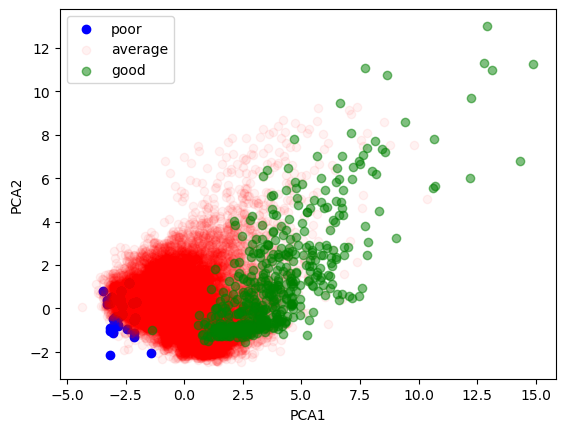

In [95]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = decomposition.PCA(n_components=2)
X2 = pca.fit_transform(X)

print(X.shape)
print(X2.shape)

index1=np.where(np.isin(y, [1, 2, 3, 4]))[0]
index2=np.where(np.isin(y, [5, 6, 7, 8, 9, 10]))[0]
index3=np.where(np.isin(y, [11, 12, 13]))[0]
ylabels =['poor', 'average', 'good']
plt.scatter(X2[index1,0],X2[index1,1],c='b',  label=ylabels[0])
plt.scatter(X2[index2,0],X2[index2,1],c='r', alpha=0.05,label=ylabels[1])
plt.scatter(X2[index3,0],X2[index3,1],c='g',alpha=0.5,label=ylabels[2])
plt.legend()
plt.xlabel('PCA1')  
plt.ylabel('PCA2')

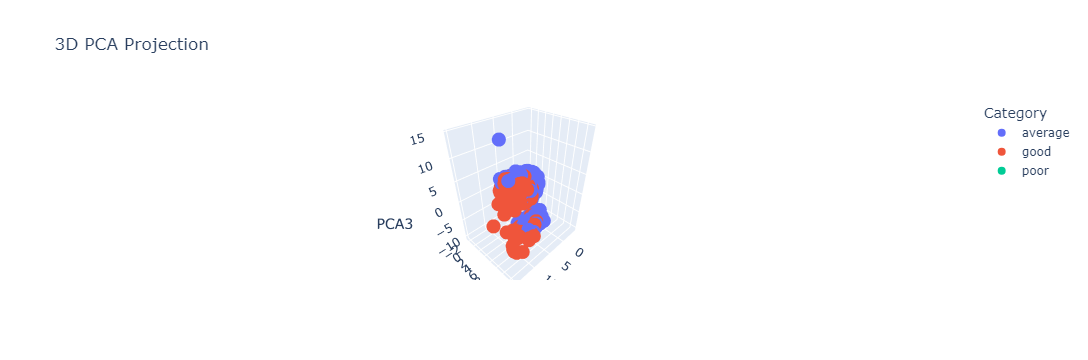

In [11]:
import plotly.express as px
pca = decomposition.PCA(n_components=3)
X3 = pca.fit_transform(X)

# Create a DataFrame for the PCA results
df_pca = pd.DataFrame(X3, columns=['PCA1', 'PCA2', 'PCA3'])

# Add your labels to the DataFrame
df_pca['Category'] = np.select(
    [np.isin(y, [1, 2, 3, 4]), np.isin(y, [5, 6, 7, 8, 9]), np.isin(y, [10, 11, 12, 13])],
    ['poor', 'average', 'good'], 
    default='unknown'
)

# Plotting using Plotly Express
fig = px.scatter_3d(df_pca, x='PCA1', y='PCA2', z='PCA3', color='Category',
                    labels={'PCA1': 'PCA1', 'PCA2': 'PCA2', 'PCA3': 'PCA3'},
                    title="3D PCA Projection")
fig.show()

# Implications for Prediction:
Feature Selection and Model Complexity: Given the overlap between the red and green categories, simple linear models may struggle to distinguish between "average" and "good" unless additional features or nonlinearities are considered. More complex models or additional dimensions (beyond the first two principal components) might be necessary for effective classification.
Potential for Dimensionality Reduction: While PCA has successfully reduced the dimensionality of the dataset, further analysis is needed to determine if these components are sufficient for building a predictive model, especially since there's significant overlap between categories.

In [27]:
from sklearn import datasets, linear_model
from sklearn.linear_model import Lasso, Ridge, LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error ,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, \
                            RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [78]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# List of models
models = [
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=100, random_state=42),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    LinearRegression()
]

for model in models:
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    test_score = model.score(X_test, y_test)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    
    # Output results
    print(f'{model.__class__.__name__}:')
    print(f'  Test set R2: {test_score:.2f}')
    print(f'  CV R2: {cv_scores.mean():.2f}\n')


DecisionTreeRegressor:
  Test set R2: 0.58
  CV R2: 0.54

RandomForestRegressor:
  Test set R2: 0.78
  CV R2: 0.76

AdaBoostRegressor:
  Test set R2: 0.68
  CV R2: 0.68

GradientBoostingRegressor:
  Test set R2: 0.76
  CV R2: 0.74

LinearRegression:
  Test set R2: 0.67
  CV R2: 0.65



DecisionTreeRegressor: Shows moderate performance with an R2 of 0.58 on the test set and 0.54 on CV. This indicates some degree of overfitting as the model performs better on the test set than in cross-validation.

RandomForestRegressor: Delivers the best performance among the models with R2 scores of 0.78 on the test set and 0.76 on CV. The scores are closely matched, suggesting that the model is robust and generalizes well across different subsets of the datahods.

AdaBoostRegressor: Has consistent but modest performance with an R2 of 0.68 for both test set and CV, indicating stability across different data splits but with room for improvement in overall fit.

GradientBoostingRegressor: Also shows strong performance with R2 scores of 0.76 on the test set and 0.74 on CV, similar to the RandomForest but with a slight indication of overfitting.

LinearRegression: Displays lower performance compared to ensemble methods, with an R2 of 0.67 on the test set and 0.65 on CV, suggesting that the data might have non-linear patterns that linear models struggle to capture..

**Overall, the RandomForest and GradientBoosting regressors emerge as the most effective models for this dataset, both showing high and closely matched R2 scores on the test and CV evaluations, indicating good generalization. The DecisionTree shows signs of overfitting, and the simpler Linear Regression does not capture the complexity of the dataset as effectively as the ensemble methods.**

## Which models to pick and why:

Random Forest Regressor appears to be the best model among those tested, with the highest R2 score (0.77 on the test set and 0.76 on cross-validation). This suggests it is quite robust and consistent across different subsets of your data. Random Forests are generally effective because they handle a variety of data types well, are less prone to overfitting than individual decision trees due to their ensemble nature, and can model complex nonlinear relationships.

Other models like GradientBoostingRegressor and AdaBoostRegressor also performed well, indicating that ensemble methods are generally successful on this dataset, likely due to their ability to capture complex patterns and reduce variance and bias.

Linear Regression and DecisionTreeRegressor performed less impressively. Linear Regression might underperform if the relationship between variables is nonlinear or if features interact in complex ways. Decision Trees might overfit unless carefully tuned or ensemble-averaged as in Random Forests.


**The Random Forest Regressor has already been identified as the best performing model based on the R2 scores from both the test set and cross validation.**

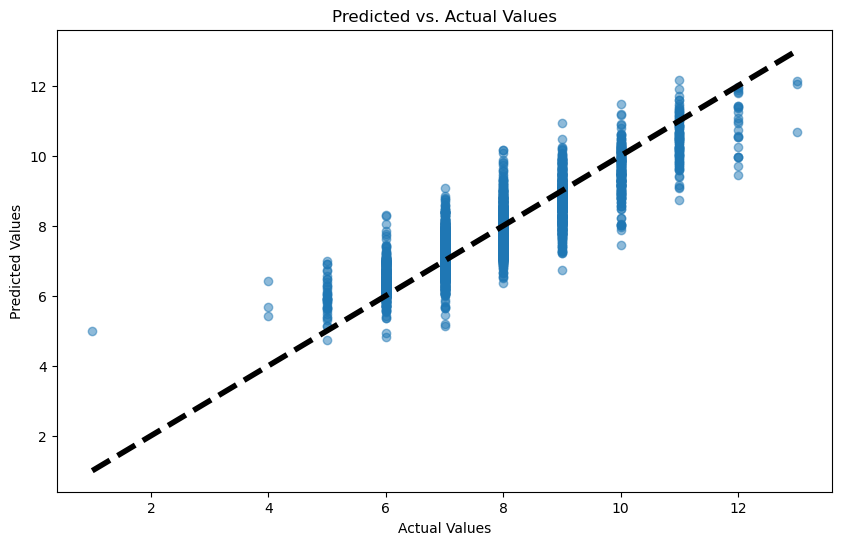

In [39]:
# Fit the Random Forest Regressor on the whole dataset to visualize
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()


For the confusion matrix/ boundary plot, they are typically used for classification problems. However, they are not really applicable for regression tasks as they will not have a meaningful interpretation.

## Which features are most important?

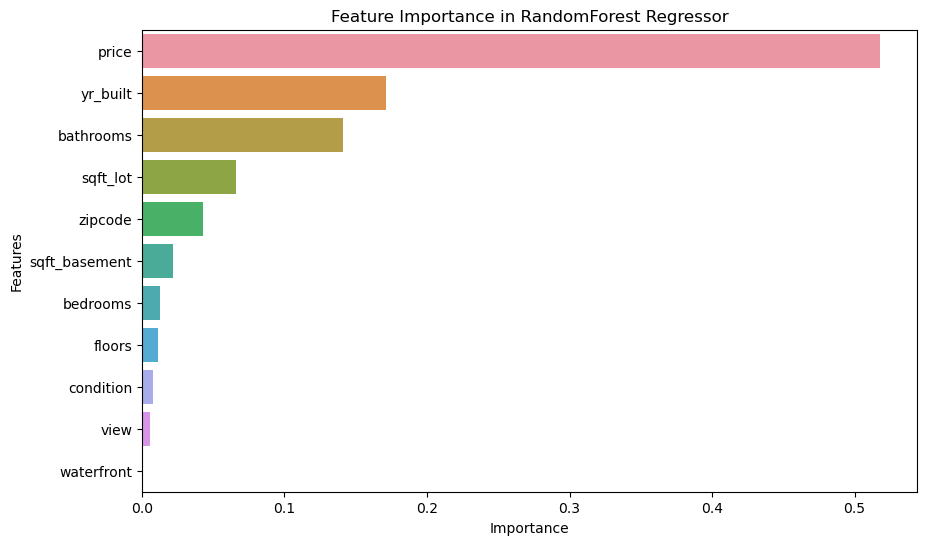

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'rf' is your trained RandomForestRegressor from previous steps

# Get feature importance
importances = rf.feature_importances_

# Get the feature names
feature_names = ['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
                 'view', 'condition', 'sqft_basement', 'yr_built', 'zipcode']

# Create a DataFrame for easier handling and visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in RandomForest Regressor')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


The "Importance Score" is derived from how much each feature splits points in a tree, weighted by the number of samples it splits and averaged across all trees in the forest. A higher score means the feature is more important for making accurate predictions.


In a RandomForest, each node in the tree is split on a feature that results in the largest decrease in variance of the target variable. Features that frequently result in significant variance reduction are considered more important.

In [96]:
X_reduced = df[['price', 'yr_built']].to_numpy()
X_reduced = StandardScaler().fit_transform(X)

X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train the RandomForest with reduced features
rf_reduced = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reduced.fit(X_train_reduced, y_train_reduced)
predictions_reduced = rf_reduced.predict(X_test_reduced)
r2_reduced = r2_score(y_test_reduced, predictions_reduced)

# Output the R² scores for comparison
print(f"R² score with 'price' and 'yr_built' only: {r2_reduced:.2f}")

R² score with 'price' and 'yr_built' only: 0.77


**R² score with 'price' and 'yr_built' is almost the same as when we used all features. Therefore, we can drop all the other features.**

## Predictions 


In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

X_reduced = df[['price', 'yr_built']].to_numpy()
y = df['grade'].to_numpy()

scaler = StandardScaler()
X_reduced_scaled = scaler.fit_transform(X_reduced)

rf_reduced = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reduced.fit(X_reduced_scaled, y)

# Predict using the trained model
test_data = np.array([[221900 , 1955],  # Price: 221900, Year Built: 1955
                     [538000, 1951]]) # Price: 538000, Year Built: 1951

test_data_scaled = scaler.transform(test_data) 
predictions = rf_full.predict(test_data_scaled)

print("Predicted grades for the provided houses:")
for price, year, pred in zip(test_data[:, 0], test_data[:, 1], predictions):
    print(f"Price: ${price}, Year Built: {year}, Predicted Grade: {pred:.0f}")


Predicted grades for the provided houses:
Price: $221900, Year Built: 1955, Predicted Grade: 7
Price: $538000, Year Built: 1951, Predicted Grade: 7


**The models predicted the grade for both data points correct!**

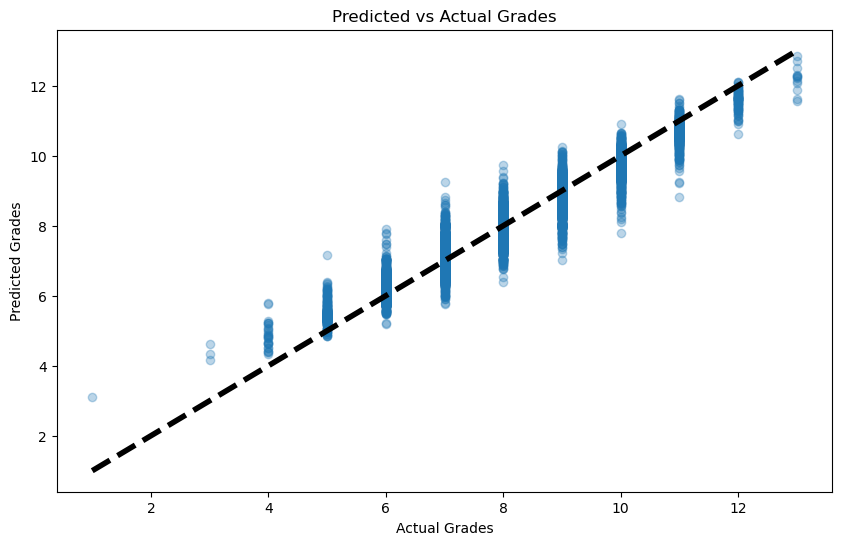

In [103]:
# Predict the grades for the entire dataset
predictions = rf_reduced.predict(X_reduced_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(y, predictions, alpha=0.3)
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Predicted vs Actual Grades')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Line showing perfect predictions
plt.show()

## Explaination and Analysis

The scatter plotillustrates the relationship between the actual and predicted grades of houses, using a RandomForestRegressor trained on "price" and "yr_built" as features. The dashed line represents perfect prediction, where the predicted grades would exactly match the actual grades. Points closely aligned along this line indicate accurate predictions. Observing the plot, there's a reasonable alignment along the dashed line, especially for mid-range grades (around 4 to 9), suggesting the model performs well in this region. However, the spread of points, particularly for lower and higher grades, indicates some variance in the model's predictive accuracy. The vertical clustering of points at certain actual grade values suggests that the model might be experiencing difficulty in differentiating between grades that are close in characteristics or that there are certain prevalent grade values in the data. Overall, the model appears competent but might benefit from additional features or more complex modeling techniques to capture nuances at the extremes of the grade spectrum.

## Conclusion


In conclusion, this data project has successfully employed a RandomForestRegressor to predict house grades based on a dataset of housing features, yielding insights into the predictive importance of various characteristics. The correlationmatrixp reveals relationships among features, indicating potential redundancies and unique contributions, such as the high correlation between 'sqft_living' and several other features, suggesting that living space is a critical factor influencing other house attributes. The feature importance plot further emphasizes the significance of 'price' and 'yr_built' as primary predictors, aligning with our expectations that newer and more expensive houses tend to have higher grades.

The scatter plot comparing predicted grades versus actual grades showcases the model's ability to capture the general trend, though some variance remains, especially at the higher and lower ends of the grade spectrum. This indicates that while the model is robust across a typical range of properties, its performance could be improved by either refining the feature set or exploring more complex modeling approaches to capture nuances more effectively.

Overall, the project demonstrates the potential of machine learning in real estate valuation, providing a robust framework for predicting property grades with significant accuracy. Future work could explore the inclusion of additional features, more sophisticated feature engineering, or the application of different machine learning algorithms to enhance prediction accuracy and model interpretability.